In [1]:
!pip install plotly_express --quiet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

pd.set_option('display.max_columns', None)

In [3]:
#from matplotlib import rcParams
#rcParams['figure.figsize'] = 12, 8

In [4]:
apple_music_history = pd.read_csv('Apple Music - Play History Daily Tracks.csv',low_memory=False)

In [5]:
apple_music_history.head()

Country  Track Identifier Media type  Date Played Hours  \
0  Mexico         978194965        NaN     20150921     1   
1  Mexico        1014524098        NaN     20150921     1   
2  Mexico        1017805142        NaN     20150921     1   
3  Mexico        1040568440        NaN     20150921     1   
4  Mexico         958730756        NaN     20150922    20   

   Play Duration Milliseconds                            End Reason Type  \
0                       89000  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM   
1                       37000                                        NaN   
2                           0  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM   
3                           0  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM   
4                     1320000  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM   

  Source Type  Play Count  Skip Count Ignore For Recommendations  \
0        IPOD           1           1                        NaN   
1        IPOD           1           0                        NaN   
2        IPOD           0           1                        NaN   
3        IPOD           0           1                        NaN   
4        IPOD           5           1                        NaN   

   Track Reference                              Track Description  
0              NaN                                  Apple Music 1  
1              NaN                      Kurt Vile - Pretty Pimpin  
2     1.017805e+09                      The Weeknd - In the Night  
3     1.040568e+09                    Ellie Goulding - On My Mind  
4     9.587308e+08  Stevie Wonder - Superstition (Single Version)

In [9]:
apple_music_history['Date Played'] = pd.to_datetime(apple_music_history['Date Played'],format = '%Y%m%d')

In [10]:
apple_music_history.head()

Country  Track Identifier Media type Date Played Hours  \
0  Mexico         978194965        NaN  2015-09-21     1   
1  Mexico        1014524098        NaN  2015-09-21     1   
2  Mexico        1017805142        NaN  2015-09-21     1   
3  Mexico        1040568440        NaN  2015-09-21     1   
4  Mexico         958730756        NaN  2015-09-22    20   

   Play Duration Milliseconds                            End Reason Type  \
0                       89000  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM   
1                       37000                                        NaN   
2                           0  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM   
3                           0  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM   
4                     1320000  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM   

  Source Type  Play Count  Skip Count Ignore For Recommendations  \
0        IPOD           1           1                        NaN   
1        IPOD           1           0                        NaN   
2        IPOD           0           1                        NaN   
3        IPOD           0           1                        NaN   
4        IPOD           5           1                        NaN   

   Track Reference                              Track Description  
0              NaN                                  Apple Music 1  
1              NaN                      Kurt Vile - Pretty Pimpin  
2     1.017805e+09                      The Weeknd - In the Night  
3     1.040568e+09                    Ellie Goulding - On My Mind  
4     9.587308e+08  Stevie Wonder - Superstition (Single Version)

In [21]:
apple_music_history[['Artist Name', 'Song Name']]=apple_music_history['Track Description'].str.split(pat = ' - ', expand = True,n=1)

In [22]:
apple_music_history.head()

Country  Track Identifier Media type Date Played Hours  \
0  Mexico         978194965        NaN  2015-09-21     1   
1  Mexico        1014524098        NaN  2015-09-21     1   
2  Mexico        1017805142        NaN  2015-09-21     1   
3  Mexico        1040568440        NaN  2015-09-21     1   
4  Mexico         958730756        NaN  2015-09-22    20   

   Play Duration Milliseconds                            End Reason Type  \
0                       89000  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM   
1                       37000                                        NaN   
2                           0  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM   
3                           0  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM   
4                     1320000  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM   

  Source Type  Play Count  Skip Count Ignore For Recommendations  \
0        IPOD           1           1                        NaN   
1        IPOD           1           0                        NaN   
2        IPOD           0           1                        NaN   
3        IPOD           0           1                        NaN   
4        IPOD           5           1                        NaN   

   Track Reference                              Track Description  \
0              NaN                                  Apple Music 1   
1              NaN                      Kurt Vile - Pretty Pimpin   
2     1.017805e+09                      The Weeknd - In the Night   
3     1.040568e+09                    Ellie Goulding - On My Mind   
4     9.587308e+08  Stevie Wonder - Superstition (Single Version)   

      Artist Name                      Song Name  
0   Apple Music 1                           None  
1       Kurt Vile                  Pretty Pimpin  
2      The Weeknd                   In the Night  
3  Ellie Goulding                     On My Mind  
4   Stevie Wonder  Superstition (Single Version)

In [24]:
apple_music_history.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117042 entries, 0 to 117041
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Country                     117042 non-null  object        
 1   Track Identifier            117042 non-null  int64         
 2   Media type                  108527 non-null  object        
 3   Date Played                 117042 non-null  datetime64[ns]
 4   Hours                       117042 non-null  object        
 5   Play Duration Milliseconds  117042 non-null  int64         
 6   End Reason Type             117041 non-null  object        
 7   Source Type                 117042 non-null  object        
 8   Play Count                  117042 non-null  int64         
 9   Skip Count                  117042 non-null  int64         
 10  Ignore For Recommendations  93609 non-null   object        
 11  Track Reference             114091 non-

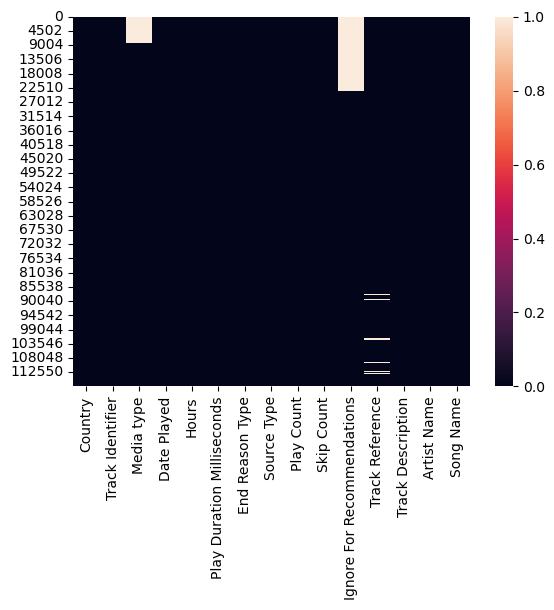

In [25]:
sns.heatmap(apple_music_history.isnull())
plt.show()

In [26]:
delete = ['Country','Track Identifier','Media type','Ignore For Recommendations','Track Reference','Track Description']
apple_music_history.drop(delete, axis=1, inplace=True)

In [27]:
apple_music_history.head()

Date Played Hours  Play Duration Milliseconds  \
0  2015-09-21     1                       89000   
1  2015-09-21     1                       37000   
2  2015-09-21     1                           0   
3  2015-09-21     1                           0   
4  2015-09-22    20                     1320000   

                             End Reason Type Source Type  Play Count  \
0  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM        IPOD           1   
1                                        NaN        IPOD           1   
2  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM        IPOD           0   
3  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM        IPOD           0   
4  MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM        IPOD           5   

   Skip Count     Artist Name                      Song Name  
0           1   Apple Music 1                           None  
1           0       Kurt Vile                  Pretty Pimpin  
2           1      The Weeknd                   In the Night  
3           1  Ellie Goulding                     On My Mind  
4           1   Stevie Wonder  Superstition (Single Version)

In [28]:
top_artists = apple_music_history['Artist Name'].value_counts()[:10]

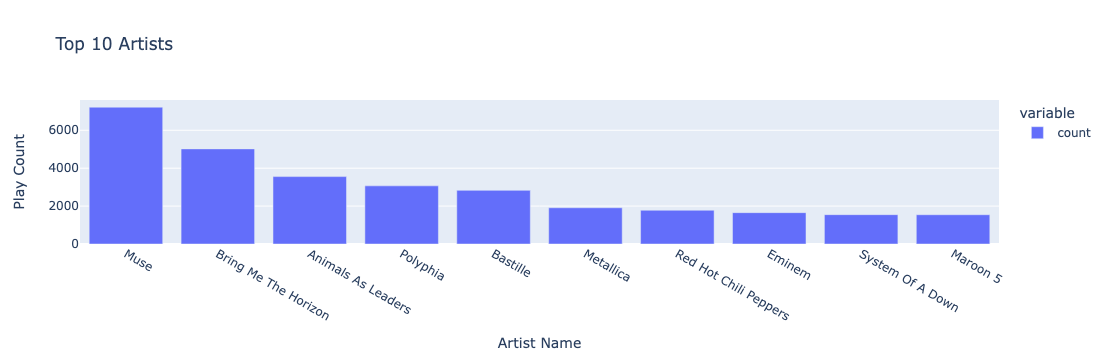

In [41]:
fig = px.bar(top_artists, title="Top 10 Artists", labels={"index":"Artist", 'value':"Play Count"})
fig.show()

In [42]:
top_songs = apple_music_history['Song Name'].value_counts()[:20]

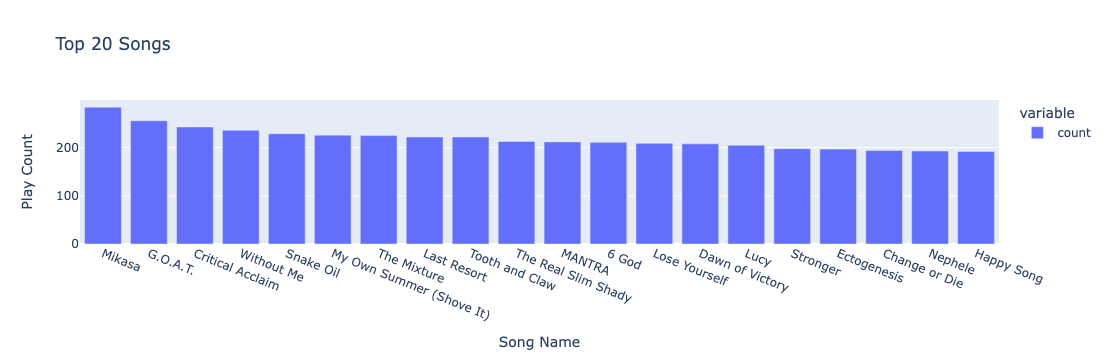

In [48]:
fig = px.bar(top_songs, title="Top 20 Songs", labels={"index":"Songs", 'value':"Play Count"})
fig.update_xaxes(tickangle=22)
fig.show()

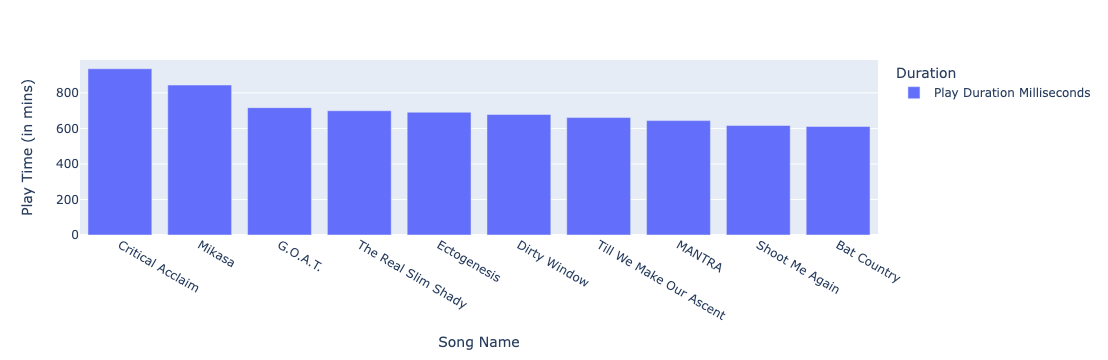

In [52]:
time_played = apple_music_history.groupby('Song Name')['Play Duration Milliseconds'].sum().sort_values(ascending=False)
time_played = time_played / 60000

fig = px.bar(time_played[:10], labels={"Content Name": "Song Names", "value": "Play Time (in mins)", "variable":"Duration"})
fig.show()

In [56]:
apple_music_history['End Reason Type'].value_counts()

End Reason Type
TRACK_SKIPPED_FORWARDS                       62817
NATURAL_END_OF_TRACK                         35372
MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM    13501
PLAYBACK_MANUALLY_PAUSED                      3963
TRACK_SKIPPED_BACKWARDS                        775
SCRUB_END                                      285
NOT_APPLICABLE                                 141
PLAYBACK_SUSPENDED                              73
SCRUB_BEGIN                                     72
EXITED_APPLICATION                              21
FAILED_TO_LOAD                                  16
OTHER                                            4
PLAYBACK_STOPPED_DUE_TO_SESSION_TIMEOUT          1
Name: count, dtype: int64

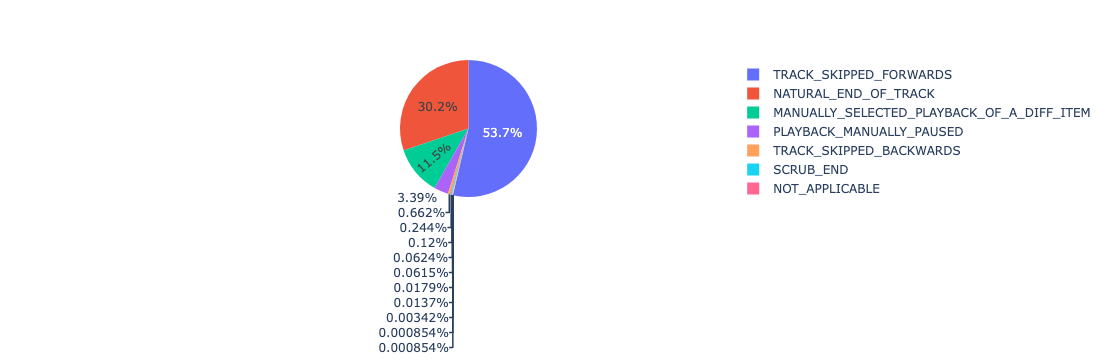

In [55]:
fig = px.pie(music_df, names='End Reason Type')
fig.show()

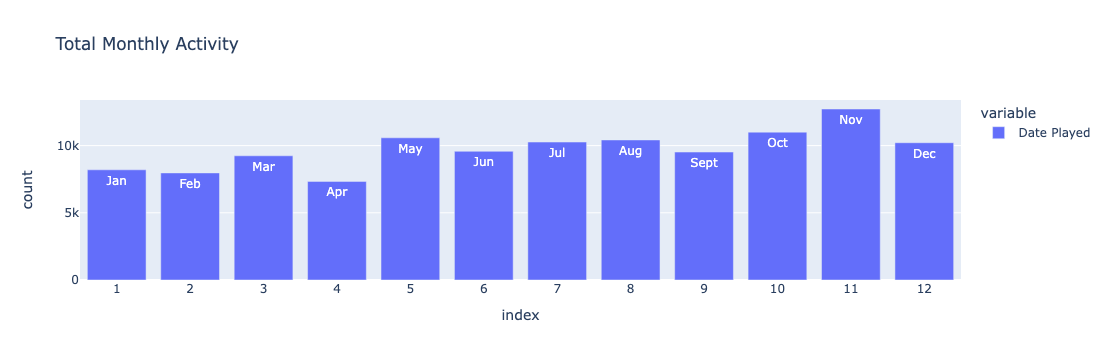

In [60]:
months = apple_music_history["Date Played"].groupby(apple_music_history["Date Played"].dt.month).count()

m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov','Dec']

fig = px.bar(months, title="Total Monthly Activity", text=m, labels={"value": "count", "Event Start Timestamp":"Months"})
fig.update_xaxes(dtick=1)
fig.show()

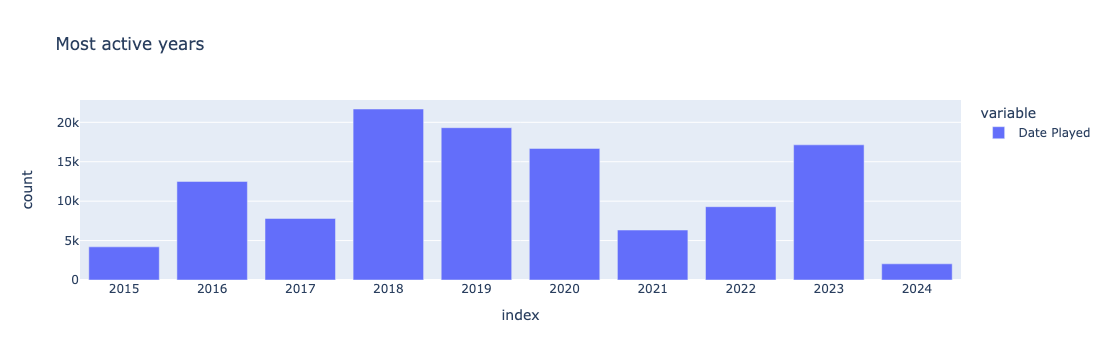

In [62]:
years = apple_music_history["Date Played"].groupby(apple_music_history["Date Played"].dt.year).count()

fig = px.bar(years, title="Most active years", labels={"value": "count", "Date Played":"Year"})
fig.update_xaxes(dtick=1)
fig.show()

In [63]:
total_time = apple_music_history['Play Duration Milliseconds'].sum()
total_mins = total_time/60000

print("Total minutes spent: {:.2f} mins".format(total_mins))

total_hours = total_mins/60
print("Total hours spent: {:.2f} hours".format(total_hours))

Total minutes spent: 249625.35 mins
Total hours spent: 4160.42 hours
